## Extract TLD in WebRTC Fingerprinting scripts

This notebook extracts the TLDs for script_url and location in WebRTC Fingerprinting scripts. The heuristics to find out the WebRTC Fingerprinting scripts is directly taken from [2019_03_willougr_fingerprinting_implementation_sixth_sense/WebRTC Fingerprinting Heuristics](https://github.com/mozilla/overscripted/blob/master/analyses/2019_03_willougr_fingerprinting_implementation_sixth_sense/WebRTC%20Fingerprinting%20Heuristics.ipynb).

In [4]:
import dask.dataframe as dd
import pandas as pd
from collections import Counter
import json

from dask.distributed import Client, progress

DATA_DIR = 'YOUR DATA DIRECTORY HERE'
DATA_DIR_FULL = '/home/soumya/Dataset/sample_0.parquet'
Client()

/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)
/home/soumya/.conda/envs/overscripted/lib/python3.6/site-packages/distributed/bokeh/core.py:57: UserWarning: 
Port 8787 is already in use. 
Perhaps you already have a cluster running?
Hosting the diagnostics dashboard on a random port instead.
  warnings.warn('\n' + msg)


Client Scheduler: tcp://127.0.0.1:45157 Dashboard: http://127.0.0.1:40157/status,Cluster Workers: 4 Cores: 12 Memory: 8.25 GB


## Setup

In [6]:
df = dd.read_parquet(DATA_DIR_FULL, columns=['script_url', 'symbol', 'location'])
df = df[['script_url', 'symbol', 'location']]
df.head()

,script_url,symbol,location
call_id,,,
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__0,https://vk.com/js/api/xdm.js?1449919642,window.name,https://vk.com/widget_comments.php?app=2297596...
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__1,https://vk.com/js/api/xdm.js?1449919642,window.name,https://vk.com/widget_comments.php?app=2297596...
1_00006011493ed94fb8010cead84ee610cdbece5de961abe96f0cba54.json__2,https://vk.com/js/al/aes_light.js?592436914,window.navigator.userAgent,https://vk.com/widget_comments.php?app=2297596...
1_00006b1ad6ce7a5b2b81a8ef96f0778853ea6d81a97693d85a52790c.json__0,https://cpro.baidustatic.com/cpro/ui/noexpire/...,window.navigator.userAgent,https://pos.baidu.com/s?hei=70&wid=670&di=u313...
1_0000813d43acf1fe219ada01597cfb1d5dc9c12b61f343c6cfac362b.json__0,https://apis.google.com/js/plusone.js?_=151338...,window.document.cookie,http://serienjunkies.org/smilf/smilf-season-1-...


## Pull out Candidate URLs for RTCPeerConnection.onicecandidate

In [7]:
onicecandidate_candidate_urls_df = df[df.symbol == 'RTCPeerConnection.onicecandidate']
onicecandidate_candidate_urls_df = onicecandidate_candidate_urls_df[['script_url', 'location']].drop_duplicates().persist()
progress(onicecandidate_candidate_urls_df, notebook=False)

/home/soumya/.local/lib/python3.6/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [8]:
onicecandidate_candidate_urls_df = onicecandidate_candidate_urls_df.compute()
onicecandidate_candidate_urls_df.head()

,script_url,location
call_id,,
1_0001e211e7dd3877ff0243ae0ba0d1f6f9963ca210656cbd8c53681a.json__148,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://maniform.world.tmall.com/category-1282...
1_00192dd939606d0cf33d4ad4b9af45016033991bd0ca23e445186a63.json__14,http://g.alicdn.com/secdev/sufei_data/3.2.2/in...,http://c.youku.com/abouteg/youtu
1_004010408d52b4795f9c28996bc478ce21097bd70a25c5ec32b06588.json__103,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?acm=...
1_006fa636a8391d1f4f4b79dcb0a6b76f1121b488f31b7159a13572b9.json__92,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?abbu...
1_009b1cd1cc99c638f3ca546996cc3fade323d725907078138bf457d6.json__41,https://g.alicdn.com/security/umscript/3.3.2/u...,https://login.taobao.com/member/login.jhtml?fr...


In [9]:
onicecandidate_candidate_urls = set(onicecandidate_candidate_urls_df.itertuples(index=False))

## Pull out Candidate URLs for RTCPeerConnection.createDataChannel

In [10]:
create_data_channel_candidate_urls_df = df[df.symbol == 'RTCPeerConnection.createDataChannel']
create_data_channel_candidate_urls_df = create_data_channel_candidate_urls_df[['script_url', 'location']].drop_duplicates().persist()
progress(create_data_channel_candidate_urls_df, notebook=False)

In [11]:
create_data_channel_candidate_urls_df = create_data_channel_candidate_urls_df.compute()
create_data_channel_candidate_urls_df.head()

,script_url,location
call_id,,
1_0001e211e7dd3877ff0243ae0ba0d1f6f9963ca210656cbd8c53681a.json__149,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://maniform.world.tmall.com/category-1282...
1_00192dd939606d0cf33d4ad4b9af45016033991bd0ca23e445186a63.json__15,http://g.alicdn.com/secdev/sufei_data/3.2.2/in...,http://c.youku.com/abouteg/youtu
1_004010408d52b4795f9c28996bc478ce21097bd70a25c5ec32b06588.json__104,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?acm=...
1_006fa636a8391d1f4f4b79dcb0a6b76f1121b488f31b7159a13572b9.json__93,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?abbu...
1_009b1cd1cc99c638f3ca546996cc3fade323d725907078138bf457d6.json__42,https://g.alicdn.com/security/umscript/3.3.2/u...,https://login.taobao.com/member/login.jhtml?fr...


In [12]:
create_data_channel_candidate_urls = set(create_data_channel_candidate_urls_df.itertuples(index=False))

## Pull out Candidate URLs for RTCPeerConnection.createOffer

In [13]:
create_offer_candidate_urls_df = df[df.symbol == 'RTCPeerConnection.createOffer']
create_offer_candidate_urls_df = create_offer_candidate_urls_df[['script_url', 'location']].drop_duplicates().persist()
progress(create_offer_candidate_urls_df, notebook=False)

In [14]:
create_offer_candidate_urls_df = create_offer_candidate_urls_df.compute()
create_offer_candidate_urls_df.head()

,script_url,location
call_id,,
1_0001e211e7dd3877ff0243ae0ba0d1f6f9963ca210656cbd8c53681a.json__150,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://maniform.world.tmall.com/category-1282...
1_00192dd939606d0cf33d4ad4b9af45016033991bd0ca23e445186a63.json__16,http://g.alicdn.com/secdev/sufei_data/3.2.2/in...,http://c.youku.com/abouteg/youtu
1_004010408d52b4795f9c28996bc478ce21097bd70a25c5ec32b06588.json__105,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?acm=...
1_006fa636a8391d1f4f4b79dcb0a6b76f1121b488f31b7159a13572b9.json__94,https://g.alicdn.com/secdev/sufei_data/3.2.2/i...,https://list.tmall.com/search_product.htm?abbu...
1_009b1cd1cc99c638f3ca546996cc3fade323d725907078138bf457d6.json__43,https://g.alicdn.com/security/umscript/3.3.2/u...,https://login.taobao.com/member/login.jhtml?fr...


In [15]:
create_offer_candidate_urls = set(create_offer_candidate_urls_df.itertuples(index=False))

## URLs should call all of: [RTCPeerConnection.onicecandidate, RTCPeerConnection.createDataChannel, RTCPeerConnection.createOffer]

In [16]:
all_candidate_urls = onicecandidate_candidate_urls | create_data_channel_candidate_urls | create_offer_candidate_urls
candidate_urls = onicecandidate_candidate_urls & create_data_channel_candidate_urls & create_offer_candidate_urls

In [17]:
print('# of unique tuples (script_url, location) that call all 3 symbols:', len(candidate_urls))
print('# of unique tuples (script_url, location) that only call 1 or 2 symols:', len(all_candidate_urls - candidate_urls))

# of unique tuples (script_url, location) that call all 3 symbols: 1224
# of unique tuples (script_url, location) that only call 1 or 2 symols: 664


In [18]:
with open('not_webrtc_multi_symbol_fingerprinting_1.json', 'w') as f:
    f.write(json.dumps(list(set([script_url for script_url, location in (all_candidate_urls - candidate_urls)]))))

Note: conversion from a list to a set to a list above is used in case the same script_url is called from multiple locations

## Drop false positives

In [19]:
false_positives = {
    "nextwebsnetworks.com/in/video",
    "nextwebsnetworks.com/in/remnant",
    "sandbox02.kaxsdc.com/collect/logo.htm",
    "digitalforexnfashionstyles.com/sms4send2.php",
    "www.badlion.net/",
    "ajax.googleapis.com/ajax/libs/jquery/1.8/jquery.min.js"
}

webrtc_fp_urls = set([(script_url, location) for script_url, location in candidate_urls if script_url not in false_positives])

In [20]:
print('# of unique tuples (script_url, location) that were false positives:', len(candidate_urls - webrtc_fp_urls))
print('# of unique tuples (script_url, location) that used WebRTC fingerprinting:', len(webrtc_fp_urls))

# of unique tuples (script_url, location) that were false positives: 0
# of unique tuples (script_url, location) that used WebRTC fingerprinting: 1224


In [21]:
with open('not_webrtc_multi_symbol_fingerprinting_2.json', 'w') as f:
    f.write(json.dumps(list(set([script_url for script_url, location in (candidate_urls - webrtc_fp_urls)]))))

## Save Candidate URLs

In [22]:
with open('webrtc_multi_symbol_fingerprinting.json', 'w') as f:
    f.write(json.dumps(list(set([script_url for script_url, location in webrtc_fp_urls]))))

## Find Locations

In [23]:
with open('webrtc_multi_symbol_fingerprinting.json', 'r') as f:
    webrtc_fp_urls = json.load(f)
    
print(len(webrtc_fp_urls), '== 1313')

230 == 1313


In [24]:
df = dd.read_parquet(DATA_DIR_FULL, columns=['script_url', 'location'])

In [25]:
df_locs = df[df.script_url.isin(webrtc_fp_urls)]
locs = df_locs.location.unique().persist()
progress(locs, notebook=False)

In [26]:
print('# of locations that call WebRTC fingerprinting scripts:', len(locs))

# of locations that call WebRTC fingerprinting scripts: 1376


In [27]:
webrtc_fp_urls[0:5]

['https://carrinho.pontofrio.com.br/Js/TagManager/external/sloth1.4.6.71bfad3.js',
 'https://pixel.yabidos.com/flimpobj.js?cb=1513446037871&ver1=2.1.9&rnd=hr5roybrixfx&cid=726',
 'https://socauth.privatbank.ua/cp/handler.html?startLoadFrame=1513454438523&quick_start=1&is_collect_gpu=1&seance=1513454438531.0140.3167444152788419allo.ua0.6844558841191968&visit_num=1&sys=10012355.UA&redirect_count=0&navigation_type=0&navigation_start_datetime=1513454435&visit_id=1513454438534.1130.5894160589450229https%253A%252F%252Fallo.ua%252Fksenon%252F0.3851809444257299&load_time=14',
 'https://cdn02.tiket.photos/min/f=js/general.js,js/jquery.cookie.js,js/jquery.qtip.min.js,js/jquery.easing-1.3.pack.js,js/jquery.dropdown.js,js/tiket2/jquery.carousel.js,js/tiket2/home.js,js/floating-widget.js,js/jquery/jquery.datepicker-id.js,js/socmed.js,js/dropdown.js,js/dropdownfixer.js,2/js/custom.js,2/js/currency.js,2/js/third_party/emarsys.js,2/js/global-custom.js?20171207_1610',
 'https://socauth.privatbank.ua/cp

In [28]:
location=locs.compute()
location[0:10]

0    https://maniform.world.tmall.com/category-1282...
1        https://torrentsgroup.com/torrents.php?cat=49
2                     http://c.youku.com/abouteg/youtu
3    https://list.tmall.com/search_product.htm?acm=...
4    http://www.thebay.com/webapp/wcs/stores/servle...
5    https://list.tmall.com/search_product.htm?abbu...
6    https://login.taobao.com/member/login.jhtml?fr...
7        https://www.jomashop.com/glycine-watches.html
8    https://list.tmall.com/search_product.htm?cat=...
9    https://finviz.com/screener.ashx?v=210&s=ta_p_...
Name: location, dtype: object

## Extract TLD for script_url

In [29]:
import tldextract
opsuffix=[]
opurls=[]
for i in range(len(webrtc_fp_urls)):
    opurls.append(tldextract.extract(webrtc_fp_urls[i]))
    opsuffix.append(opurls[i].suffix)
opsuffix[0:20]

['com.br',
 'com',
 'ua',
 'photos',
 'ua',
 'ua',
 'com',
 'com',
 'ua',
 'com',
 'cn',
 'com',
 'com',
 'cn',
 'com',
 'com',
 '',
 'cn',
 'com',
 'cn']

In [30]:
len(webrtc_fp_urls)

230

## Extract TLD for location

In [31]:
opsuffix_locs=[]
opurls_locs=[]
for i in range(len(locs)):
    opurls_locs.append(tldextract.extract(location[i]))
    opsuffix_locs.append(opurls_locs[i].suffix)
print(opsuffix_locs[0:20])

['com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'com', 'hk', 'com', 'tv']


## Frequency of each TLD for script_url

In [32]:
import collections
for i in range(len(opsuffix)):
    counter_script_url=collections.Counter(opsuffix)
print(counter_script_url)


Counter({'com': 143, 'cn': 42, 'ua': 22, 'net': 11, 'photos': 4, 'vn': 2, 're': 2, 'com.br': 1, '': 1, 'io': 1, 'es': 1})


In [33]:
# Store in a json file
with open('WebRTC_script_url.json', 'w') as f:
    f.write(json.dumps(counter_script_url)) 


In [34]:
len(counter_script_url)

11

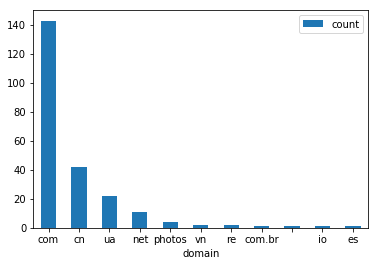

In [40]:
# Arange in descending order    
c=Counter(counter_script_url)
counter_script_url=dict(c.most_common())

#Convert to list for plotting
domain=list(counter_script_url.keys())
count=list(counter_script_url.values())

dfplot = pd.DataFrame({'domain':domain, 'count':count})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)

## Frequency of each TLD for location

In [36]:
for i in range(len(locs)):
    counter_location=collections.Counter(opsuffix_locs)
print(counter_location)

Counter({'com': 1110, 'cn': 44, 'hk': 39, 'co': 26, 'net': 26, 'ua': 22, 'com.br': 19, 'vn': 16, 'tv': 9, 'es': 5, 'biz': 5, 'com.hk': 4, 'com.vn': 4, 'co.uk': 4, 'io': 4, 'club': 3, 'at': 3, 'fr': 3, 'to': 3, 'sc': 3, 'ie': 3, 'ca': 3, 'in': 3, 'watch': 3, 'ec': 2, 'bz': 2, 'ao': 1, 'jp': 1, 'com.au': 1, 'eu': 1, 'media': 1, 'com.uy': 1, 'pl': 1, 'co.th': 1})


In [37]:
# Store in a json file
with open('WebRTC_location.json', 'w') as f:
    f.write(json.dumps(counter_location)) 

In [38]:
len(counter_location)

34

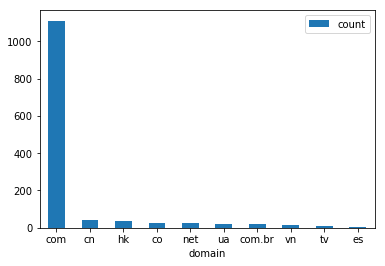

In [39]:
# Arange in descending order    
c=Counter(counter_location)
counter_location=dict(c.most_common())

#Convert to list for plotting
domain=list(counter_location.keys())
count=list(counter_location.values())

dfplot = pd.DataFrame({'domain':domain[0:10], 'count':count[0:10]})
ax = dfplot.plot.bar(x='domain', y='count', rot=0)